# Denoising autoencoders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrian),(xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(xtrain.shape,xtest.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
xtrain = (xtrain-127.5)/127.5
xtest = (xtest-127.5)/127.5

In [5]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

### Modelling the network for denoising autoencoders

In [6]:
from tensorflow.keras import models,layers

In [7]:
# encoder
ip = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(2,2))(ip)
c2 = layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=(2,2))(c1)

#decoder
c3 = layers.Conv2DTranspose(8,(3,3),activation='relu',padding='same',strides=(2,2))(c2)
c4 = layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same',strides=(2,2))(c3)
op = layers.Conv2D(1,(3,3),activation='tanh',padding='same')(c4)

model = models.Model(inputs=ip,outputs=op)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
___________________________________________________________

In [8]:
model.compile(optimizer='adam',loss='mse')

In [9]:
import tensorflow as tf

In [14]:
noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor*tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor*tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,+1.0)
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,+1.0)

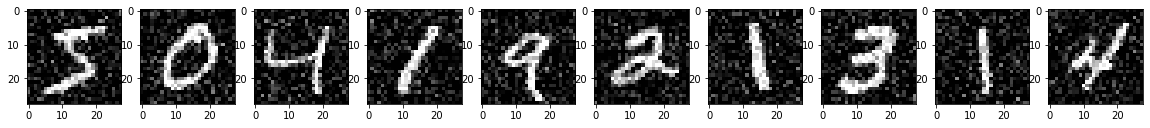

In [15]:
plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap='gray')
plt.show()

In [16]:
model.fit(xtrain_noisy,xtrain,epochs=20,batch_size=1000,shuffle=True, validation_data = (xtest_noisy,xtest))

Epoch 1/20
60/60 [==============================] - 3s 47ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 2/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 3/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 4/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0151 - val_loss: 0.0148
Epoch 5/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 6/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0149 - val_loss: 0.0146
Epoch 7/20
60/60 [==============================] - 2s 42ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 8/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0147 - val_loss: 0.0144
Epoch 9/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0146 - val_loss: 0.0143
Epoch 10/20
60/60 [==============================] - 3s 42ms/step - loss: 0.0145 - val_loss: 0.0142
Epoch 11/

In [17]:
predictions = model.predict(xtest_noisy)
predictions.shape

(10000, 28, 28, 1)

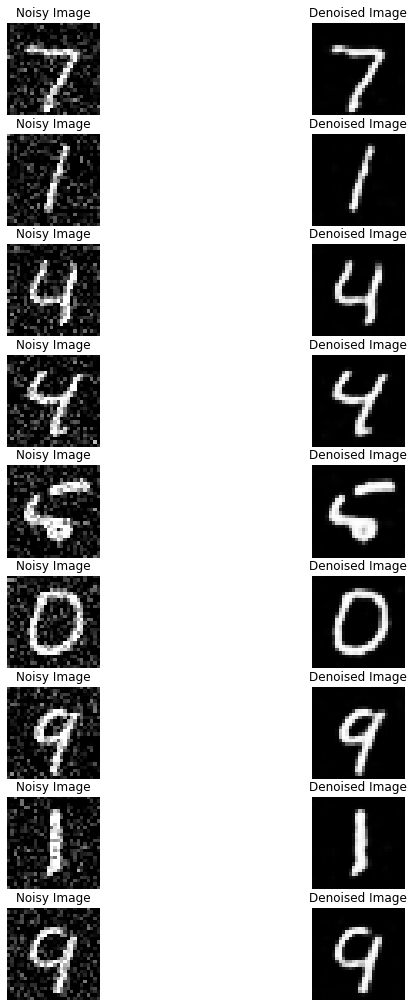

In [20]:
plt.figure(figsize=(10,20))
for i in range(0,18,2):
  plt.subplot(10,2,i+1)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap='gray')
  plt.title("Noisy Image")
  plt.axis("off")
  plt.subplot(10,2,i+2)
  plt.imshow(predictions[i].reshape(28,28),cmap='gray')
  plt.title("Denoised Image")
  plt.axis("off")
